In [218]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [219]:
#use dataset with
location = "datasets/CC GENERAL.CSV"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [220]:
sortBal = df.sort_values(by=['BALANCE'])
sortBal.tail()
#>>> df.sort_values(by=['col1'])

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5281,C15429,16115.59640,1.0,684.74,105.30,579.44,4354.002428,1.0,0.083333,1.000000,0.583333,15,15,18000.0,3546.061550,5743.736444,0.0,12
6629,C16812,16259.44857,1.0,5024.68,3582.45,1442.23,328.698275,1.0,0.833333,1.000000,0.083333,2,143,18000.0,4987.235359,5137.504664,0.0,12
5488,C15642,16304.88925,1.0,1770.57,0.00,1770.57,7424.094447,0.5,0.000000,0.416667,0.666667,13,9,19000.0,5337.961195,8345.641905,0.0,12
4140,C14256,18495.55855,1.0,5288.28,3657.30,1630.98,0.000000,1.0,0.583333,1.000000,0.000000,0,76,22000.0,4246.168346,4227.081580,0.0,12
138,C10144,19043.13856,1.0,22009.92,9449.07,12560.85,0.000000,1.0,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.0,12


In [221]:
sortBal['BALANCE'].max()

19043.13856

In [222]:
df['BALANCE'].dtypes

dtype('float64')

In [223]:
df.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [224]:
temp = df.dropna()
#df.dropna(inplace = True)
#temp.count()
temp.count()

CUST_ID                             8636
BALANCE                             8636
BALANCE_FREQUENCY                   8636
PURCHASES                           8636
ONEOFF_PURCHASES                    8636
INSTALLMENTS_PURCHASES              8636
CASH_ADVANCE                        8636
PURCHASES_FREQUENCY                 8636
ONEOFF_PURCHASES_FREQUENCY          8636
PURCHASES_INSTALLMENTS_FREQUENCY    8636
CASH_ADVANCE_FREQUENCY              8636
CASH_ADVANCE_TRX                    8636
PURCHASES_TRX                       8636
CREDIT_LIMIT                        8636
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                    8636
TENURE                              8636
dtype: int64

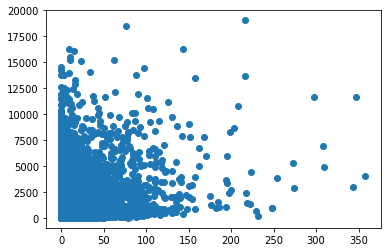

In [225]:
plt.scatter(temp['PURCHASES_TRX'],temp['BALANCE'])

In [226]:
temp.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [248]:
#i'm binning the balances as "category"
bins = [0,5000, 10000, 15000, 20000]

#create names for the for four groups
group_names =  [0,1,2,3]

#make new column with category groups
temp['category'] = pd.cut(temp['BALANCE'], bins, labels=group_names)
temp['category'].unique()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [228]:
temp.count()

CUST_ID                             8636
BALANCE                             8636
BALANCE_FREQUENCY                   8636
PURCHASES                           8636
ONEOFF_PURCHASES                    8636
INSTALLMENTS_PURCHASES              8636
CASH_ADVANCE                        8636
PURCHASES_FREQUENCY                 8636
ONEOFF_PURCHASES_FREQUENCY          8636
PURCHASES_INSTALLMENTS_FREQUENCY    8636
CASH_ADVANCE_FREQUENCY              8636
CASH_ADVANCE_TRX                    8636
PURCHASES_TRX                       8636
CREDIT_LIMIT                        8636
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                    8636
TENURE                              8636
category                            8630
dtype: int64

In [229]:
temp.dropna(inplace = True)
temp.count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CUST_ID                             8630
BALANCE                             8630
BALANCE_FREQUENCY                   8630
PURCHASES                           8630
ONEOFF_PURCHASES                    8630
INSTALLMENTS_PURCHASES              8630
CASH_ADVANCE                        8630
PURCHASES_FREQUENCY                 8630
ONEOFF_PURCHASES_FREQUENCY          8630
PURCHASES_INSTALLMENTS_FREQUENCY    8630
CASH_ADVANCE_FREQUENCY              8630
CASH_ADVANCE_TRX                    8630
PURCHASES_TRX                       8630
CREDIT_LIMIT                        8630
PAYMENTS                            8630
MINIMUM_PAYMENTS                    8630
PRC_FULL_PAYMENT                    8630
TENURE                              8630
category                            8630
dtype: int64

In [230]:
temp['category'].unique()


[0, 1, 2, 3]
Categories (4, object): [0 < 1 < 2 < 3]

In [322]:
#make a dataframe called X to hold the predictive features
x = temp.drop(['CUST_ID'], axis=1)
#x = temp[['CUST_ID']]

#X=df.drop('PURCHASES_TRX', axis=1)
x[['PURCHASES_TRX','CASH_ADVANCE']]
#xandy=x[['BALANCE','PURCHASES_TRX']]
#xandy=x[['PURCHASES', 'PURCHASES_TRX']]
#xandy=x[['PURCHASES', 'BALANCE']]
xandy=x[['BALANCE', 'CREDIT_LIMIT']]
xandy.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
4,817.714335,1200.0
5,1809.828751,1800.0


In [323]:
xandy.max()

BALANCE         19043.13856
CREDIT_LIMIT    30000.00000
dtype: float64

In [324]:
temp['category'].unique()

[0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [325]:
temp.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'category'],
      dtype='object')

In [326]:
y = temp['CASH_ADVANCE_TRX'].copy()
y.head()

0    0
1    4
2    0
4    0
5    0
Name: CASH_ADVANCE_TRX, dtype: int64

In [327]:


kmeans = KMeans(n_clusters=4)


In [328]:
kmeans.fit(xandy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [329]:
print(kmeans.cluster_centers_)

[[  805.28757468  2129.76405102]
 [ 7478.76346906 11389.73451327]
 [ 1986.27966702  6348.38467318]
 [ 1300.39977365 12452.47524752]]


In [330]:
temp.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'category'],
      dtype='object')

In [331]:
temp.dtypes

CUST_ID                               object
BALANCE                              float64
BALANCE_FREQUENCY                    float64
PURCHASES                            float64
ONEOFF_PURCHASES                     float64
INSTALLMENTS_PURCHASES               float64
CASH_ADVANCE                         float64
PURCHASES_FREQUENCY                  float64
ONEOFF_PURCHASES_FREQUENCY           float64
PURCHASES_INSTALLMENTS_FREQUENCY     float64
CASH_ADVANCE_FREQUENCY               float64
CASH_ADVANCE_TRX                       int64
PURCHASES_TRX                          int64
CREDIT_LIMIT                         float64
PAYMENTS                             float64
MINIMUM_PAYMENTS                     float64
PRC_FULL_PAYMENT                     float64
TENURE                                 int64
category                            category
dtype: object

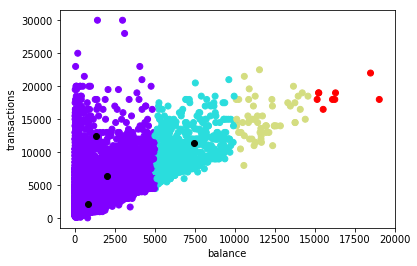

In [333]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.xlabel('balance')
plt.ylabel('transactions')
#plt.scatter(temp['BALANCE'], temp['PURCHASES_TRX'], c=temp['TENURE'], cmap = 'rainbow')
#plt.scatter(temp['BALANCE'], temp['PURCHASES_TRX'], c=temp['category'], cmap = 'rainbow')
plt.scatter(temp['BALANCE'], temp['CREDIT_LIMIT'], c=temp['category'], cmap = 'rainbow')

#only kmeans the "cluster center", the color points comes from the scatter plot
#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')#, kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], c='black')
#plt.scatter(kmeans.cluster_centers_[:,0], c='black')

In [334]:
temp['clusters'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [335]:
temp.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,category,clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0,0


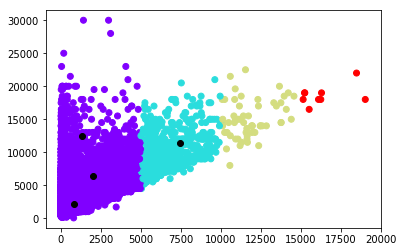

In [337]:
plt.scatter(temp['BALANCE'], temp['CREDIT_LIMIT'], c=temp['category'], cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')